In [20]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
N = 100000

# Excercise 1

In [22]:
X = np.random.normal(size=N)

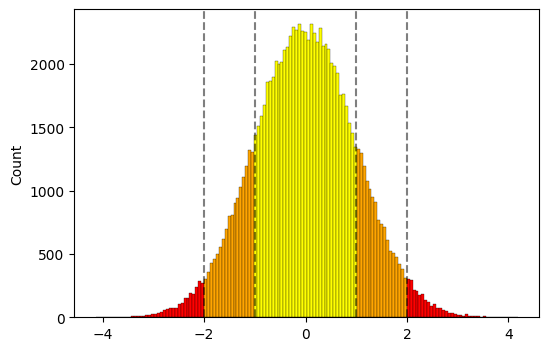

In [29]:
plt.figure(figsize=(6, 4))
hist = sns.histplot(X, edgecolor='black', alpha=0.7)

def get_color_for_bin(bin_center):
    if -1 <= bin_center <= 1:
        return 'yellow'
    elif (-2 <= bin_center < -1) or (1 < bin_center <= 2):
        return 'orange'
    else:
        return 'red'

for patch in hist.patches:
    bin_center = (patch.get_x() + patch.get_x() + patch.get_width()) / 2
    patch.set_facecolor(get_color_for_bin(bin_center))

for boundary in [-2, -1, 1, 2]:
    plt.axvline(boundary, color='black', linestyle='--', alpha=0.5)

plt.show()

# Excercise 2

Top 20% of samples hold 52.10% of total mass


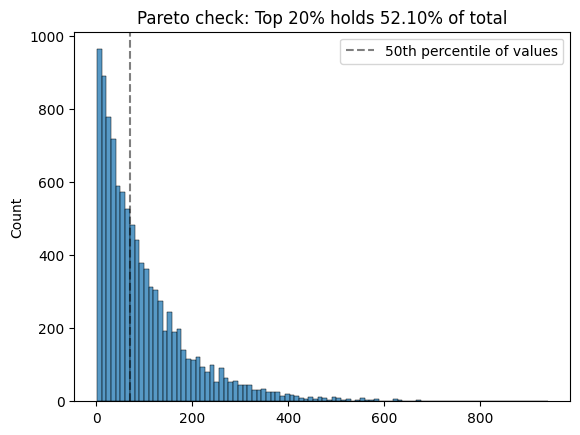

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

p = 0.01

X = np.random.geometric(p, N)

X_sorted = np.sort(X)[::-1]
total_sum = np.sum(X_sorted)
top_20_sum = np.sum(X_sorted[:int(0.2 * N)])  # Sum of top 20% samples
percentage_held = (top_20_sum / total_sum) * 100

print(f"Top 20% of samples hold {percentage_held:.2f}% of total mass")

sns.histplot(X)
plt.axvline(np.quantile(X, 0.5), color='black', linestyle='--', alpha=0.5, label='50th percentile of values')
plt.legend()
plt.title(f'Pareto check: Top 20% holds {percentage_held:.2f}% of total')
plt.show()

# Excercise 3

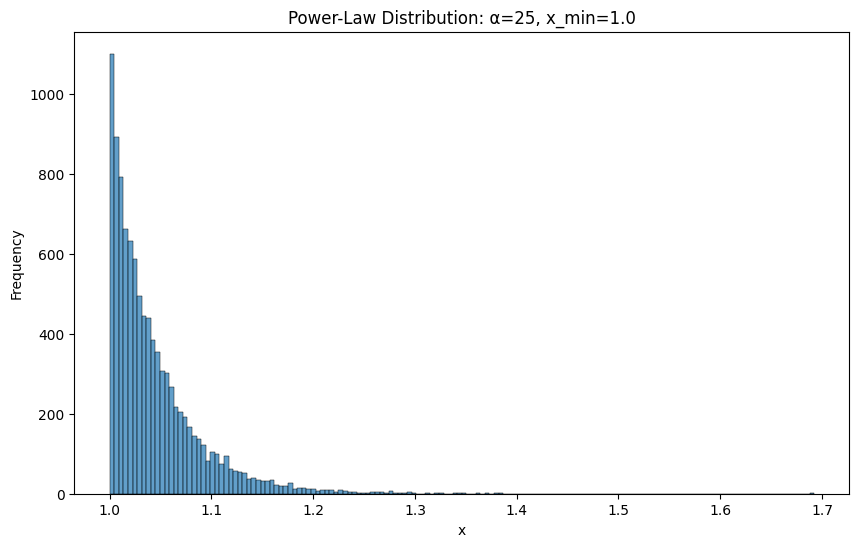

In [73]:
alpha = 25
x_min = 1.0

u = np.random.uniform(0, 1, N)
X = x_min * (1 - u) ** (-1 / (alpha - 1))

plt.figure(figsize=(10, 6))
sns.histplot(X, alpha=0.7)
plt.xlabel('x')
plt.ylabel('Frequency')
plt.title(f'Power-Law Distribution: α={alpha}, x_min={x_min}')
plt.show()

# Excercise 4

Top 20% of samples hold 80.91% of total mass


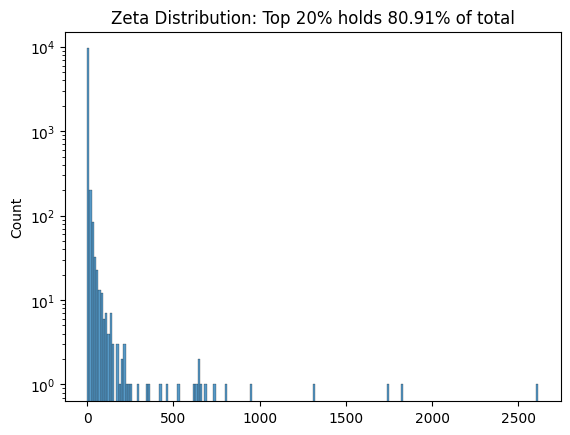

In [83]:
s = 2.0

X = np.random.zipf(s, N)

X_sorted = np.sort(X)[::-1]
total_sum = np.sum(X_sorted)
top_20_sum = np.sum(X_sorted[:int(0.2 * N)])
percentage_held = (top_20_sum / total_sum) * 100

print(f"Top 20% of samples hold {percentage_held:.2f}% of total mass")

sns.histplot(X)
plt.title(f'Zeta Distribution: Top 20% holds {percentage_held:.2f}% of total')
plt.yscale('log')
plt.show()

# Excercise 5

BA max degree: 116
ER max degree: 15


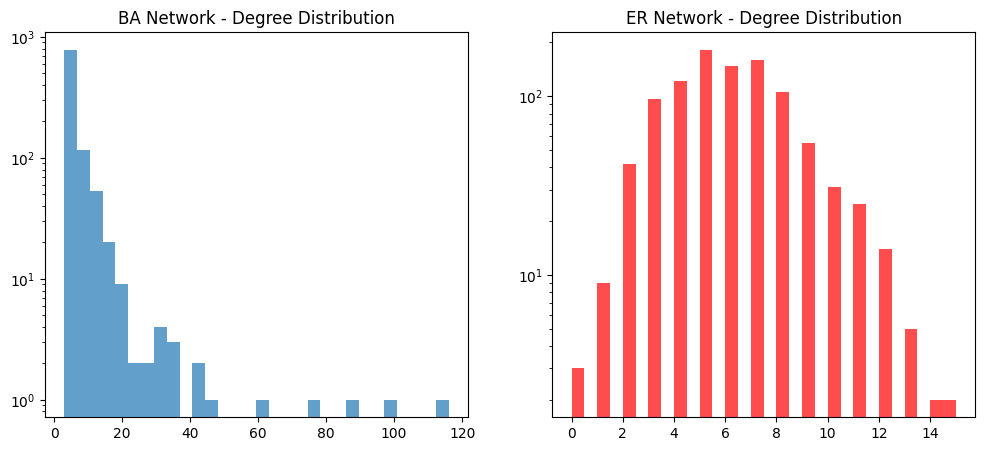

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

G_ba = nx.barabasi_albert_graph(1000, 3)
G_er = nx.erdos_renyi_graph(1000, 0.006)

ba_degrees = [d for n, d in G_ba.degree()]
er_degrees = [d for n, d in G_er.degree()]

print(f"BA max degree: {max(ba_degrees)}")
print(f"ER max degree: {max(er_degrees)}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(ba_degrees, bins=30, alpha=0.7)
plt.title('BA Network - Degree Distribution')
plt.yscale('log')

plt.subplot(1, 2, 2)
plt.hist(er_degrees, bins=30, alpha=0.7, color='red')
plt.title('ER Network - Degree Distribution')
plt.yscale('log')

plt.show()

# Part 2

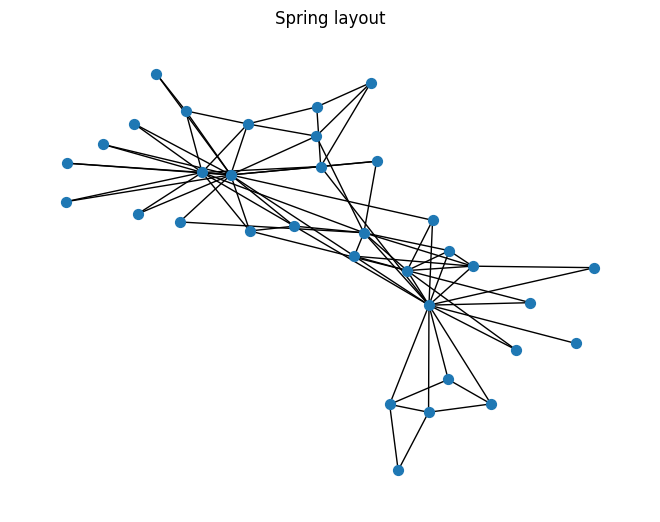

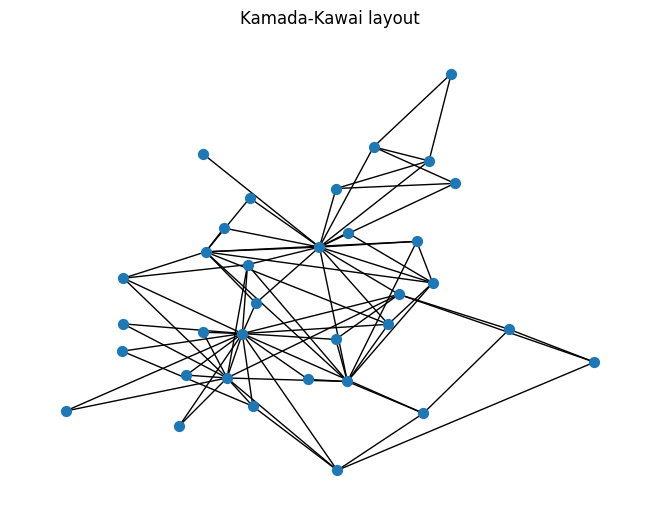

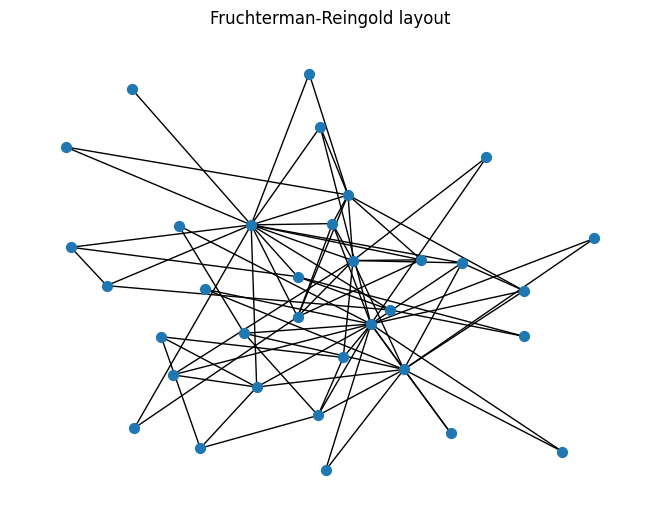

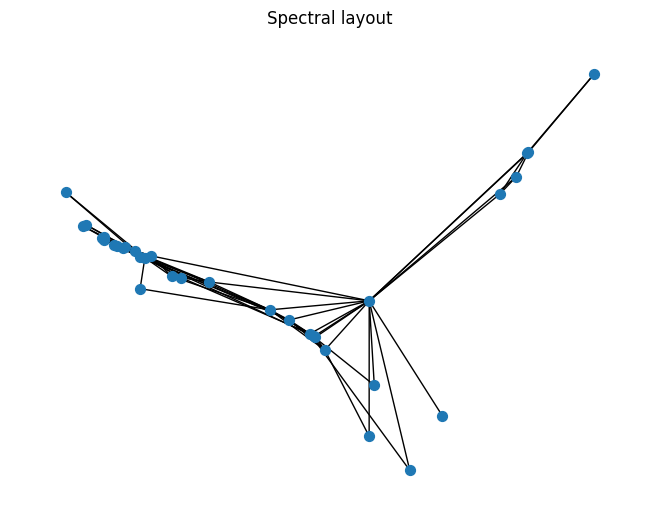

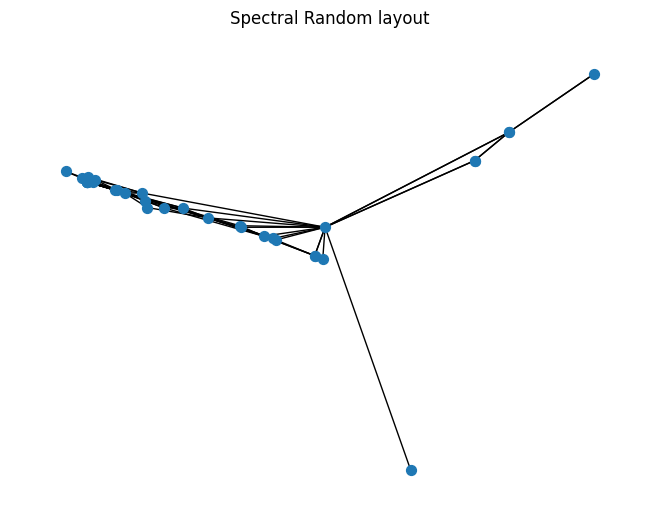

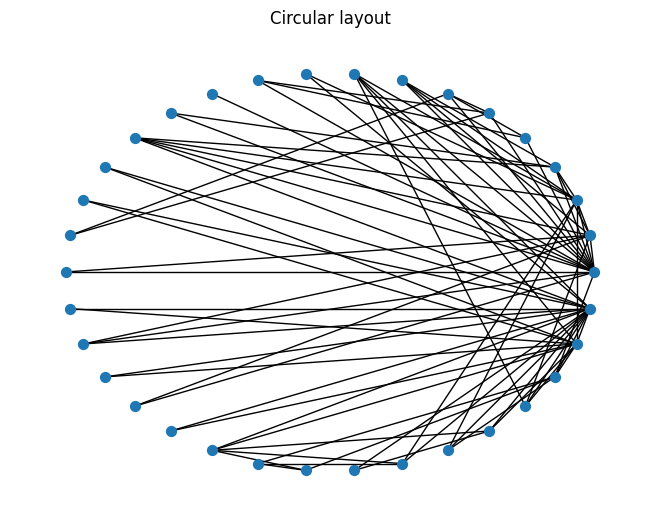

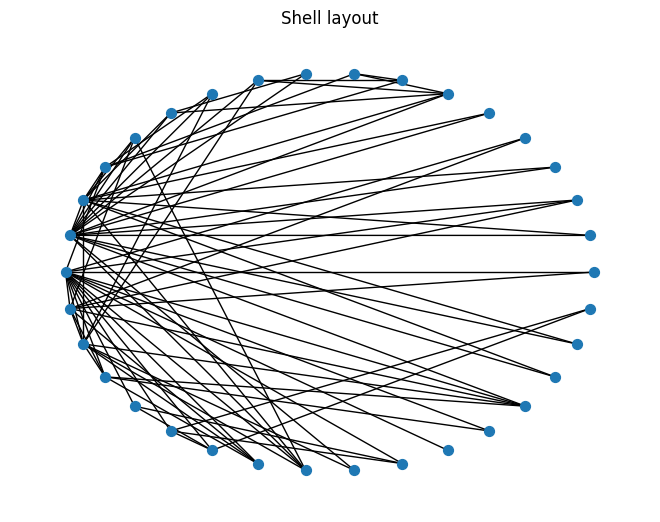

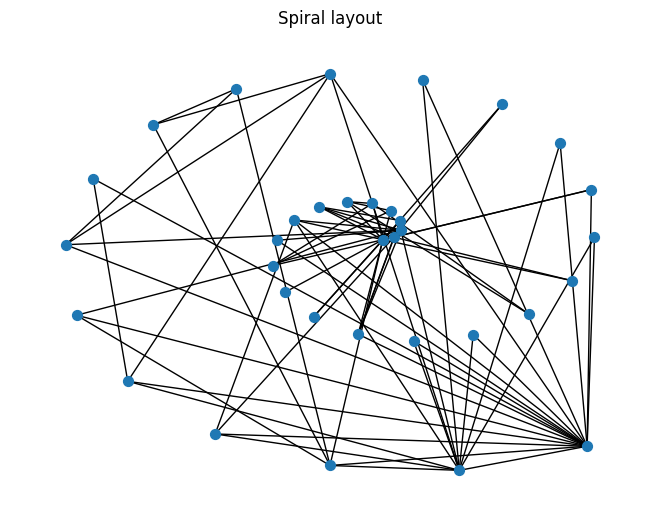

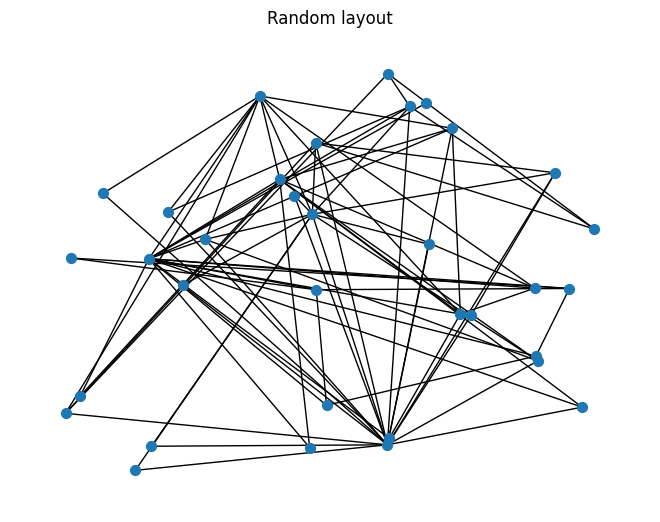

In [95]:
import networkx as nx

G = nx.karate_club_graph()

layouts = {
    'Spring': nx.spring_layout,
    'Kamada-Kawai': nx.kamada_kawai_layout,
    'Fruchterman-Reingold': lambda G: nx.spring_layout(G, k=5/np.sqrt(len(G.nodes())), iterations=50),
    'Spectral': nx.spectral_layout,
    'Spectral Random': lambda G: nx.spectral_layout(G, weight=None),
    'Circular': nx.circular_layout,
    'Shell': nx.shell_layout,
    'Spiral': nx.spiral_layout,
    'Random': nx.random_layout,
}

for name, layout_func in layouts.items():
    pos = layout_func(G)
    nx.draw(G, pos, node_size=50, with_labels=False)
    plt.title(f'{name} layout')
    plt.show()

In [1]:
from graphs.undirected import UndirectedGraph
from graphs.plotting.undirected_plotter import UndirectedGraphPlotter
from graphs.base import Node

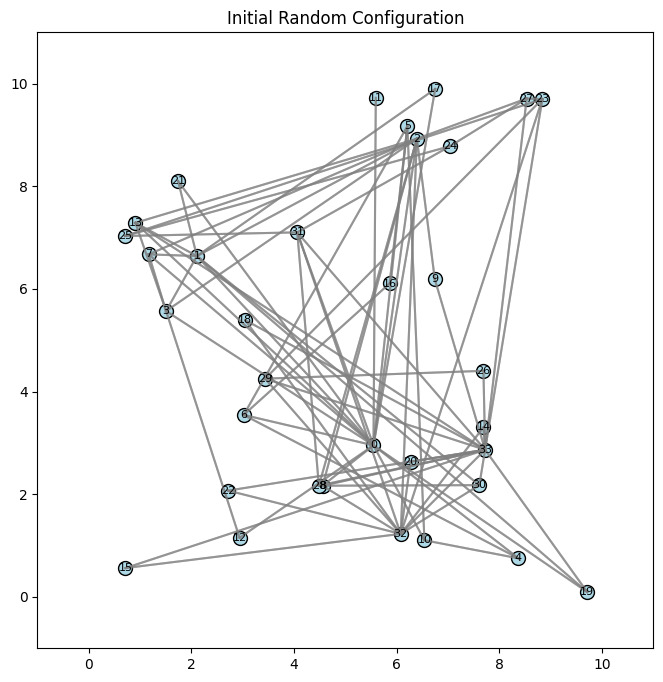

 28%|████████████████████████▏                                                              | 13897/50000 [00:28<01:20, 445.99it/s]/home/dawid/repos/social-networks-and-recommendation-systems/graphs/plotting/undirected_plotter.py:118: RuntimeWarning: overflow encountered in scalar divide
  if delta_energy < 0 or np.random.random() < np.exp(-delta_energy / temperature):
100%|███████████████████████████████████████████████████████████████████████████████████████| 50000/50000 [01:52<00:00, 445.48it/s]


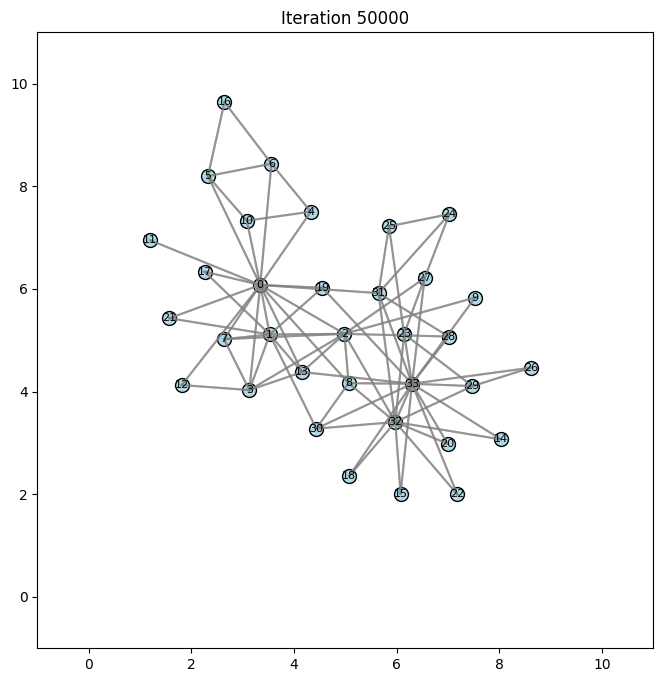

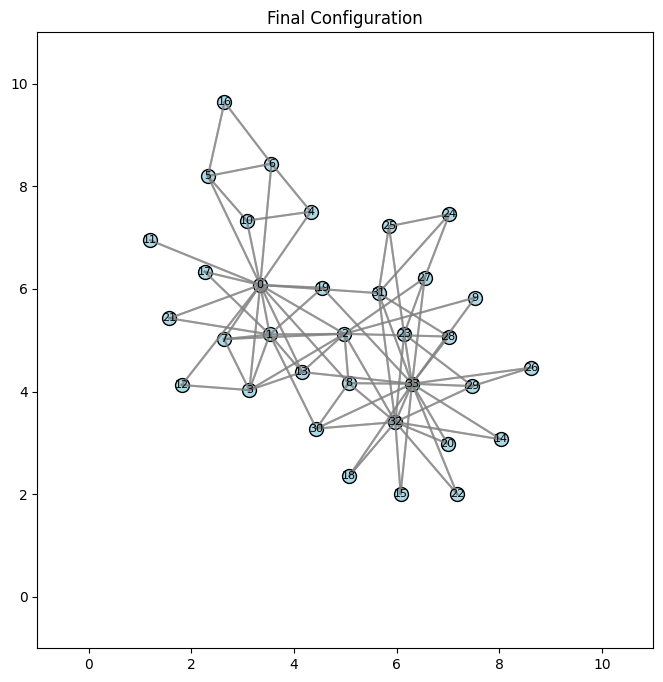

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation


G_nx = nx.karate_club_graph()
g = UndirectedGraph()

for i in range(G_nx.number_of_nodes()):
    x = np.random.uniform(0, 10)
    y = np.random.uniform(0, 10)
    g.add_vertex(Node(i, x, y))

for u, v in G_nx.edges():
    g.add_edge(u, v)

plotter = UndirectedGraphPlotter(g)
plotter.spring_layout_workflow(animation_filename='karate_club_spring_layout.gif')